In [1]:
import matplotlib.pyplot as plt

Liczba obszarów: 9
Powierzchnia domeny względem powierzchni próbki: 49.43 %


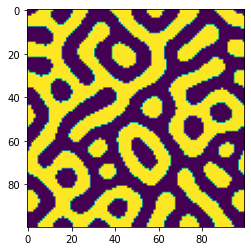

In [2]:
import numpy as np
import struct
def readOVF(plik):
    f=open(plik,"rb")
    byte=f.read()
    ii=0
    t4=b''
    t8=b''
    while (t8!=b'@\xdew\x83!\x12\xdcB') & (t4!=b'8\xb4\x96I'):
        t8=byte[ii:(ii+8)]
        t4=byte[ii:(ii+4)]
        ii=ii+1
    words=byte[0:ii].decode().replace('\n',' ').split(' ')
    xns="xnodes:"
    yns="ynodes:"
    zns="znodes:"
    bins="Binary"
    xnn=[s+1 for s,v in enumerate(words) if v==xns]
    ynn=[s+1 for s,v in enumerate(words) if v==yns]
    znn=[s+1 for s,v in enumerate(words) if v==zns]
    binn=[s+1 for s,v in enumerate(words) if v==bins]
    xn=int(words[xnn[0]])
    yn=int(words[ynn[0]])
    zn=int(words[znn[0]])
    bn=int(words[binn[0]])
    if bn==4:
        dat=struct.unpack('f'*xn*yn*zn*3,byte[(ii+bn-1):(ii+bn-1+xn*yn*zn*bn*3)])
    if bn==8:
        dat=struct.unpack('d'*xn*yn*zn*3,byte[(ii+bn-1):(ii+bn-1+xn*yn*zn*bn*3)])   
    dat3=np.array(dat).reshape(zn,yn,xn,3)
    ms=np.sqrt(pow(dat3[0,0,0,0],2)+pow(dat3[0,0,0,1],2)+pow(dat3[0,0,0,2],2))
    return dat3/ms

def oznacz(y,x,k):
    if ozn[y,x]==-1 and tab2[y,x]==0:
        ozn[y,x]=k
        oznacz((y+1)%ny,x,k)
        oznacz((y+ny-1)%ny,x,k)
        oznacz(y,(x+1)%nx,k)
        oznacz(y,(x+nx-1)%nx,k)
        
tab=readOVF("1021-d6500-q600-01-final.omf")
#tab=readOVF("Q1.80_D03mJ.ovf")[:,::3,::3]

tab2=np.round(tab[0,:,:,2]/2+1/2)
plt.imshow(tab2)

ozn=np.zeros(np.shape(tab2))-1
ny,nx=np.shape(tab2)

k=0
for y in range(len(tab2)):
    for x in range(len(tab2[y])):
        if ozn[y,x]==-1 and tab2[y,x]==0:
            oznacz(y,x,k)
            k+=1

proc_2=0            
proc_1=tab2.size


for y in range(len(tab2)):
    for x in range(len(tab2[y])):
        if tab2[y,x]==1:
            proc_2+=1

            
print("Liczba obszarów:",k)
print("Powierzchnia domeny względem powierzchni próbki:",proc_2/proc_1*100,"%")

In [9]:
print(pixel)

[[0.00e+00 1.00e+00 2.00e+00 3.00e+00 4.00e+00 5.00e+00 6.00e+00 7.00e+00
  8.00e+00]
 [3.81e+03 8.30e+01 7.04e+02 7.80e+01 7.10e+01 7.90e+01 1.01e+02 7.00e+01
  6.10e+01]]


In [10]:
pixel2=pixel[pixel<200]
print(pixel2)

[  0.   1.   2.   3.   4.   5.   6.   7.   8.  83.  78.  71.  79. 101.
  70.  61.]


In [28]:
pixel2=pixel[0]
pixel2=np.trim_zeros(pixel2, 'b')

print(pixel2)

[0. 1. 2. 3. 4. 5. 6. 7. 8.]
